In [1]:
class Debug:
    def __init__(self, level):
        self.level = level
    def msg(self, level, m):
        if(level <= self.level):
            print(m)
debug = Debug(10).msg

In [2]:
%matplotlib inline
#!/usr/bin/python
#AWS redshift connector:
#setup
from datetime import date, timedelta
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def uniqueSummary(csvname):
    df = pd.read_csv(csvname)
    newdf = pd.DataFrame(columns = df.columns)
    for colName in df.head():
        u = df[colName].unique()
        if len(u) > 100:
            newdf.loc[:, colName] = [len(u), "more than 100"]
        else:
            newdf.loc[:, colName] = [len(u), u]
    newdf = newdf.T
    
    newdf.to_csv("uniqueSummary_" + csvname)
        

In [7]:
## don't run below if you have files in the prefix of uniqueSummary_*
with open("filenames.txt") as f:
    for i in f:
        i = i.strip('\n')
        uniqueSummary(i)
        

/home/r117/miniconda3/envs/snakes/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/home/r117/miniconda3/envs/snakes/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (3,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
class LOC():
    def __init__(self,lat, long):
        self.lat = lat
        self.long = long

In [5]:
def getNodes(A, B): #point A,B must be LOC class
    row = nodedf.shape[0] #row number
    rowcount = []
    for i in range(row):
        if(withinRange(nodedf.loc[i, 'Lat'], B.lat, A.lat) and 
           withinRange(nodedf.loc[i, 'Long'], A.long, B.long)):
            rowcount.append(i)
        else:
            continue
    return nodedf.loc[rowcount, :]
def withinRange(loc1,loc2, loc3):
    if loc2 <= loc1 <= loc3:
        return True
    else:
        return False

## Get the unique probability summary
### age composition, road surface conditions, road atmospheric conditions,

In [6]:
#need to optimize this function. Approach chould be from persondf's perspective to check against suburb code,
#it would be faster that way.
def countInjuries(data): #the data is a sub dataframe of node
    #debug(10, data.head())
    injuries = {'non_injury':0, 'other_injury':0, 'serious_injury': 0, 'fatality': 0} #four categories of injuries
    debug(10, "Processing: {0}".format(data.shape[0]))
    if data.shape[0] > 0:
        tempPersondf = persondf[persondf["ACCIDENT_NO"].isin(data["ACCIDENT_NO"])]        
        injuries['fatality'] += tempPersondf[tempPersondf["INJ_LEVEL"] == 1].shape[0] 
        injuries['serious_injury'] += tempPersondf[tempPersondf["INJ_LEVEL"] == 2].shape[0]
        injuries['other_injury'] += tempPersondf[tempPersondf["INJ_LEVEL"] == 3].shape[0]
        injuries['non_injury'] += tempPersondf[tempPersondf["INJ_LEVEL"] == 4].shape[0]
    #after:
    total = sum(injuries.values())
    
    for i in injuries:
        injuries[i] = '{0:.02f}%'.format(injuries[i] / total * 100)
    
    injuries["total_injuries"] = total
    return injuries
#def findCases(colName, df1, df2): #df1 is the dataframe to look for, df2 is the dataframe to compare

In [8]:
#get age composition
def countAgeGroups(data):
    if data.shape[0] > 0:
        tempPersondf = persondf[persondf["ACCIDENT_NO"].isin(data["ACCIDENT_NO"])]
        ages = tempPersondf.AGE.value_counts()
        return ages
    else:
        print("passing an empty data")
        return None

#plot
def plotBarChart(data):
    fig, ax = plt.subplots()

    index = data.index
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = plt.bar(index, data.values, bar_width,
                     alpha=opacity,
                     color='b',
                     error_kw=error_config,
                     label='age groups')

    plt.xlabel('Age groups')
    plt.ylabel('Accident counts')
    plt.title('Age vs accidents')
    plt.legend()
    #plt.tight_layout()
    plt.show()


In [12]:
#get road surface condition
roadSurfacedf.head()
def getRoadSurface(data): #input the inrangedf
    

,ACCIDENT_NO,SURFACE_COND,Surface Cond Desc,SURFACE_COND_SEQ
0,T20060000010,1,Dry,1
1,T20060000018,1,Dry,1
2,T20060000022,1,Dry,1
3,T20060000023,1,Dry,1
4,T20060000026,1,Dry,1


In [ ]:
#get atmospheric condition

In [ ]:
#?

/home/r117/miniconda3/envs/snakes/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processing: 248


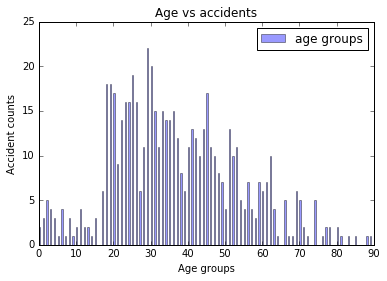

In [10]:
#for age: PERSON.csv
#for road surface: ROAD_SURFACE_COND.csv
#for road atmospheric conditions: ATMOSPHERIC_COND.csv
#checking against inrangenodedf
persondf = pd.read_csv("PERSON.csv")
roadSurfacedf = pd.read_csv("ROAD_SURFACE_COND.csv")
roadAtmosphericdf = pd.read_csv("ATMOSPHERIC_COND.csv")
nodedf = pd.read_csv("NODE.csv")

#tie everything together
pointA = LOC(-37.8007939, 144.8803823)
pointB = LOC(-37.8622120,144.8831790)
#===========
inrangedf = getNodes(pointA, pointB) #the function assume the lat is in negative values. 
#--
injuries = countInjuries(inrangedf)
ages = countAgeGroups(inrangedf) #ages = ages.to_dict can convert the data into dictionary type
plotBarChart(ages)

In [14]:
print(type(injuries))
print(injuries)
print(type(ages))
print(ages.to_dict)

<class 'dict'>
{'serious_injury': '12.76%', 'non_injury': '54.02%', 'total_injuries': 635, 'fatality': '0.16%', 'other_injury': '33.07%'}
<class 'pandas.core.series.Series'>
<bound method Series.to_dict of 29.0    22
30.0    20
25.0    19
19.0    18
18.0    18
45.0    17
20.0    17
26.0    16
24.0    16
23.0    16
33.0    15
36.0    15
31.0    15
34.0    14
35.0    14
22.0    14
51.0    13
44.0    13
41.0    13
37.0    12
42.0    12
28.0    11
40.0    11
46.0    11
32.0    11
53.0    11
62.0    10
52.0    10
43.0    10
47.0    10
        ..
63.0     4
55.0     4
57.0     4
8.0      3
15.0     3
4.0      3
1.0      3
58.0     3
10.0     2
12.0     2
13.0     2
0.0      2
77.0     2
71.0     2
80.0     2
78.0     2
7.0      1
85.0     1
83.0     1
81.0     1
5.0      1
88.0     1
64.0     1
9.0      1
76.0     1
72.0     1
68.0     1
14.0     1
67.0     1
89.0     1
Name: AGE, dtype: int64>
